In [17]:
import numpy as np
import os
import matplotlib.pyplot as plt
import chess
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
os.environ["ROCM_PATH"] = "/opt/rocm"
os.environ["HSA_OVERRIDE_GFX_VERSION"] = "10.3.0"

rnbqkbnr/1pp1pppp/8/p2pP3/8/8/PPPP1PPP/RNBQKBNR w KQkq d6 0 3
['w', 'KQkq', 'd6', '0', '3']


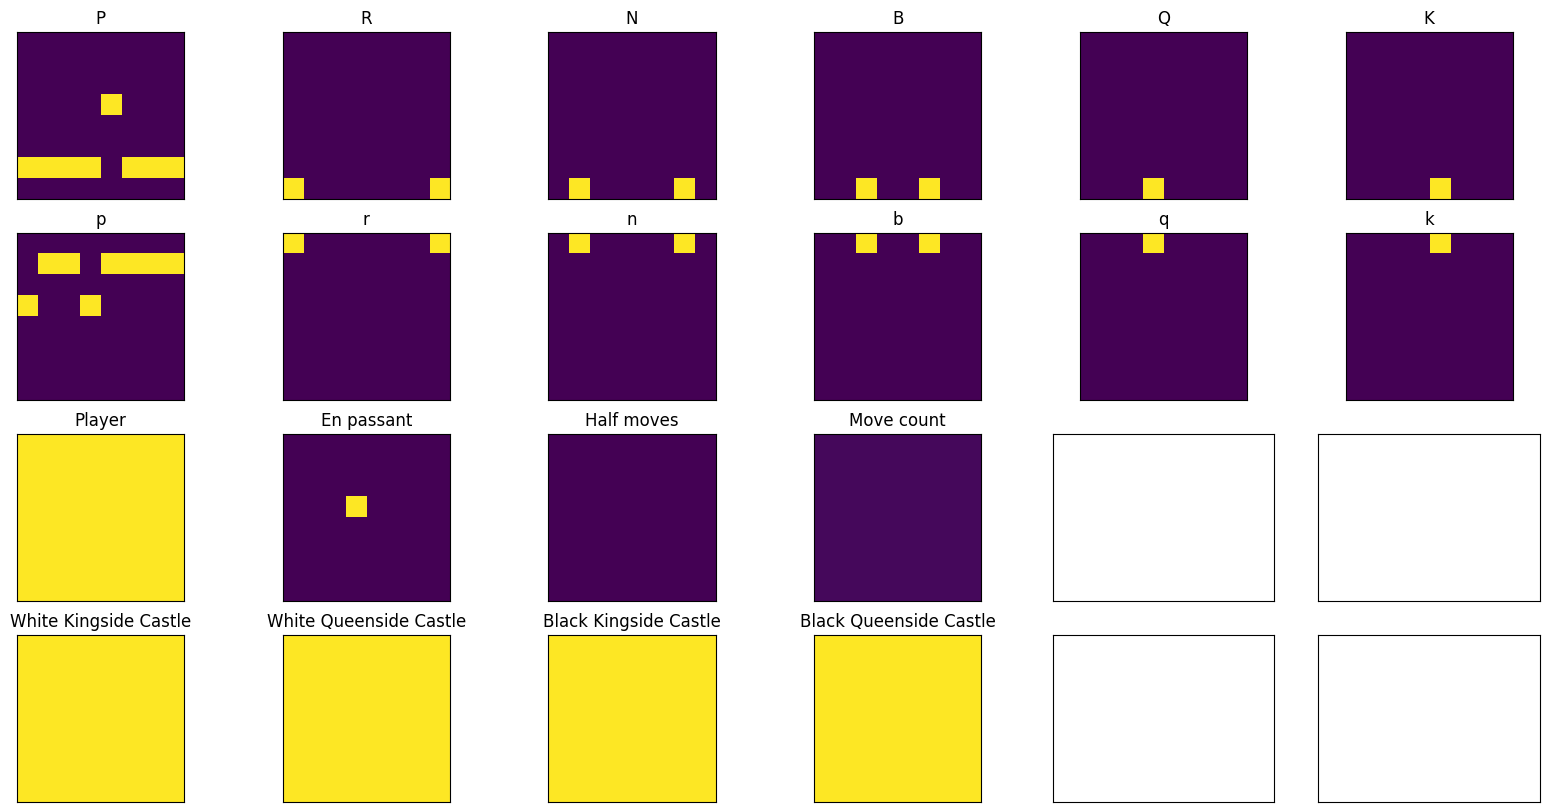

In [18]:
def get_board_rep(board: chess.Board):
    board_rep = np.zeros((8,8,12 + 8),dtype=np.float32)
    print(board.fen())
    pieces = board.board_fen().split("/")

    for (i,rank) in enumerate(pieces):
        j = 0
        while j < 8:
            piece = rank[0]
            rank = rank[1:]
            if piece.isnumeric():
                j += int(piece)
            else:
                board_rep[i,j,piece_layer[piece]] = 1
                j+=1
                
    fen = board.fen().split(" ")[1:]
    print(fen)
    if fen[0] == "w":
        board_rep[:,:,12] = 1
    if fen[2] != "-":
        i,j = chess.FILE_NAMES.index(fen[2][0]), chess.RANK_NAMES.index(fen[2][1])
        board_rep[i,8-j,13] = 1
    board_rep[:,:,14] = int(fen[3])
    board_rep[:,:,15] = int(fen[4])
    for (n, castle) in enumerate(["K","Q","k","q"]):
        if castle in fen[1]:
            board_rep[:,:,16+n] = 1
    return board_rep


piece_layer = {"P":0,"R":1,"N":2,"B":3,"Q":4, "K":5,"p":6,"r":7,"n":8,"b":9,"q":10, "k":11}

board=chess.Board()
board.push_san("e4")
# board.push_san("Nf6")
board.push_san("a5")
board.push_san("e5")
board.push_san("d5")
board_rep = get_board_rep(board)
fig,axs = plt.subplots(4,6,subplot_kw={"xticks":[], "yticks":[]},figsize=(20,10))
for i in range(2):
    for j in range(6):
        axs[i][j].imshow(board_rep[:,:,6*i + j],vmin=0, vmax=1)
        axs[i][j].set_title(list(piece_layer.keys())[6*i+j])
axs[2][0].imshow(board_rep[:,:,12],vmin=0, vmax=1)
axs[2][0].set_title('Player')
axs[2][1].imshow(board_rep[:,:,13],vmin=0, vmax=1)
axs[2][1].set_title('En passant')
axs[2][2].imshow(board_rep[:,:,14],vmin=0, vmax = 50)
axs[2][2].set_title('Half moves')
axs[2][3].imshow(board_rep[:,:,15],vmin=0, vmax = 150)
axs[2][3].set_title('Move count')
axs[3][0].imshow(board_rep[:,:,16],vmin=0, vmax=1)
axs[3][1].imshow(board_rep[:,:,17],vmin=0, vmax=1)
axs[3][2].imshow(board_rep[:,:,18],vmin=0, vmax=1)
axs[3][3].imshow(board_rep[:,:,19],vmin=0, vmax=1)
axs[3][0].set_title("White Kingside Castle")
axs[3][1].set_title("White Queenside Castle")
axs[3][2].set_title("Black Kingside Castle")
axs[3][3].set_title("Black Queenside Castle")
fig.savefig("img.png")
#0-5 - white pawn/rook/knight/bishop/queen/king
#6-11 same for black
#12 current player's color -> 1 for white
#13 en passant square
#14 half moves since last capture
#15 moves this game
#16-#19 white kingside, white queenside, black kingside, black queenside castling rules

In [19]:
import lichess.api
board = chess.Board()
board.push_uci("e2e4")
board.push_uci("e7e5")
board.push_uci("f1e2")
board.push_uci("f8e7")
board.push_uci("g1f3")
board.push_uci("g8f6")
board.push_uci("e1g1")
print(board)
print(board.peek())

r n b q k . . r
p p p p b p p p
. . . . . n . .
. . . . p . . .
. . . . P . . .
. . . . . N . .
P P P P B P P P
R N B Q . R K .
e1g1


In [20]:
class ChessModel(nn.Module):
    def __init__(self, input_shape : tuple, output_shape: tuple, hidden_layers : int, filters : int):
        super().__init__()
        self.input_shape = input_shape
        self.output_shape = output_shape
        self.hidden_layers = hidden_layers
        self.filters = filters
        self.build_model()
    def build_model(self):
        return
    def build_conv_layer(self, in_channels, out_channels) -> nn.Module:
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels,kernel_size=3,padding='same'),
            
        )




2